In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')


## Loading Data

In [2]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [4]:
df.shape

(284807, 31)

# Data Analysis

**We can see many of the features are just named as vi, this can be due to the privacy issues.**

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**The mean of the data is approximately 88 USD but the standard deviation is quite large (~250) compared to the mean.**

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**There aren't any 'Null' values so we don't have to figure out ways to fill them.**

**Now we'll see the number of cases that are fraud and number of cases that aren't fraud**

In [7]:
round(df['Class'].value_counts()/len(df)*100, 2)

0    99.83
1     0.17
Name: Class, dtype: float64

In [8]:
Non_Fraud= round(df['Class'].value_counts()[0]/len(df['Class'])*100, 2)
Fraud=round(df['Class'].value_counts()[1]/len(df['Class'])*100, 2)
print('Fraudulent cases are', Fraud, '% of the dataset')
print('Non Fraudulent cases are', Non_Fraud, "% of the data set")

Fraudulent cases are 0.17 % of the dataset
Non Fraudulent cases are 99.83 % of the data set


**We can see that our data is highly imbalanced as most of the transactions are non_fraudulent. We can not use this data frame for our prediction model as it'll assume that most of the transactions are not fraud.**

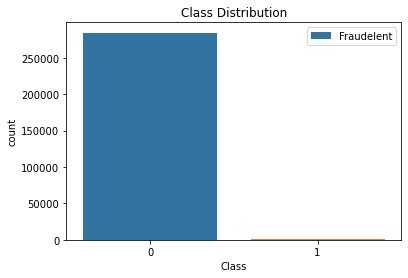

In [9]:
labels={ 'Non Fraudulent', 'Fraudelent'}
sns.countplot('Class', data=df)
plt.title('Class Distribution')
plt.legend(labels)

**By seeing the distribution also we can have an idea that how imbalanced this dataset is.**

In [10]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [11]:
#converting secands to hour
df['Hour'] = df['Time'].apply(lambda x: np.floor(x/3600))
temp=df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df_temp=pd.DataFrame(temp)
df_temp.columns=['Hour', 'Class', 'min', 'max', 'Transaction', 'sum', 'mean', 'median', 'var' ]
df_temp.head()

,Hour,Class,min,max,Transaction,sum,mean,median,var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


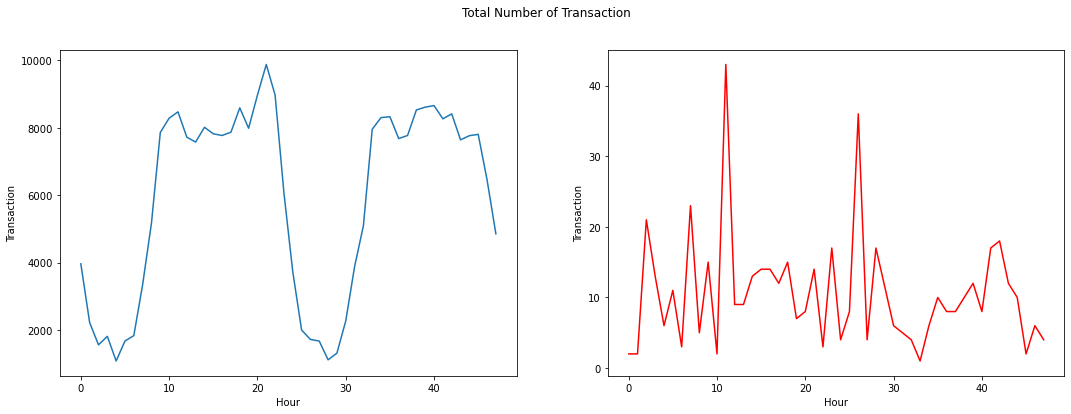

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))
sns.lineplot(ax=ax[0], x='Hour', y='Transaction', data=df_temp.loc[df_temp.Class==0])
sns.lineplot(ax=ax[1], x='Hour', y='Transaction', data=df_temp.loc[df_temp.Class==1], color='red')
plt.suptitle('Total Number of Transaction')
plt.show()

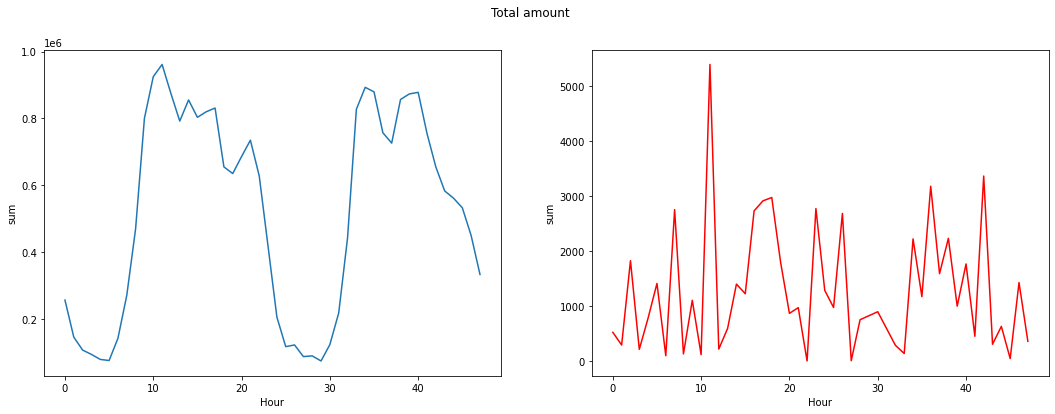

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))
sns.lineplot(ax=ax[0], x='Hour', y='sum', data=df_temp.loc[df_temp.Class==0])
sns.lineplot(ax=ax[1], x='Hour', y='sum', data=df_temp.loc[df_temp.Class==1], color='red')
plt.suptitle('Total amount')
plt.show()

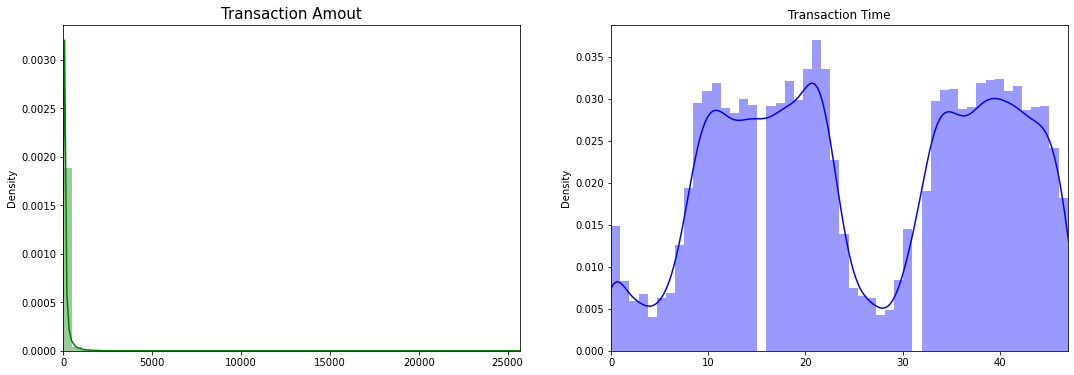

In [14]:
fig, ax=plt.subplots(ncols=2,figsize=(18,6))

sns.distplot(df['Amount'].values, ax=ax[0], color='g')
ax[0].set_title('Transaction Amout', fontsize=15)
ax[0].set_xlim([min(df['Amount'].values), max(df['Amount'].values)])

df['Hour'] = df['Time'].apply(lambda x: np.floor(x/3600))
sns.distplot(df['Hour'].values, ax=ax[1], color='b')
ax[1].set_title('Transaction Time')
ax[1].set_xlim([min(df['Hour'].values), max(df['Hour'].values)])

plt.show()



**On a close examination of above distribution we can see that the majority of Transations are less than 1250**

## Feature Scaling

**We know that our original dataeset is highly imbalance which can cause *Overfitting* as our model will assume that most cases are not froud**

In [15]:
from sklearn.preprocessing import  RobustScaler

rob_scaler=RobustScaler()

df['Amount_scaled']=rob_scaler.fit_transform(df.Amount.values.reshape(-1,1))
df['Time_scaled']=rob_scaler.fit_transform(df.Time.values.reshape(-1,1))

df.drop(['Time', 'Amount', 'Hour'],axis=1, inplace=True)

**Time And Amount are scaled**

In [16]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_scaled,Time_scaled
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


In [17]:
temp1=df.loc[df.Class==1]
temp1.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Amount_scaled,Time_scaled
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,1,-0.307413,-0.990214
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1,7.084469,-0.989438
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,1,3.045204,-0.942563
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,1,0.517013,-0.912910
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1,-0.293440,-0.906648


<Figure size 432x288 with 0 Axes>

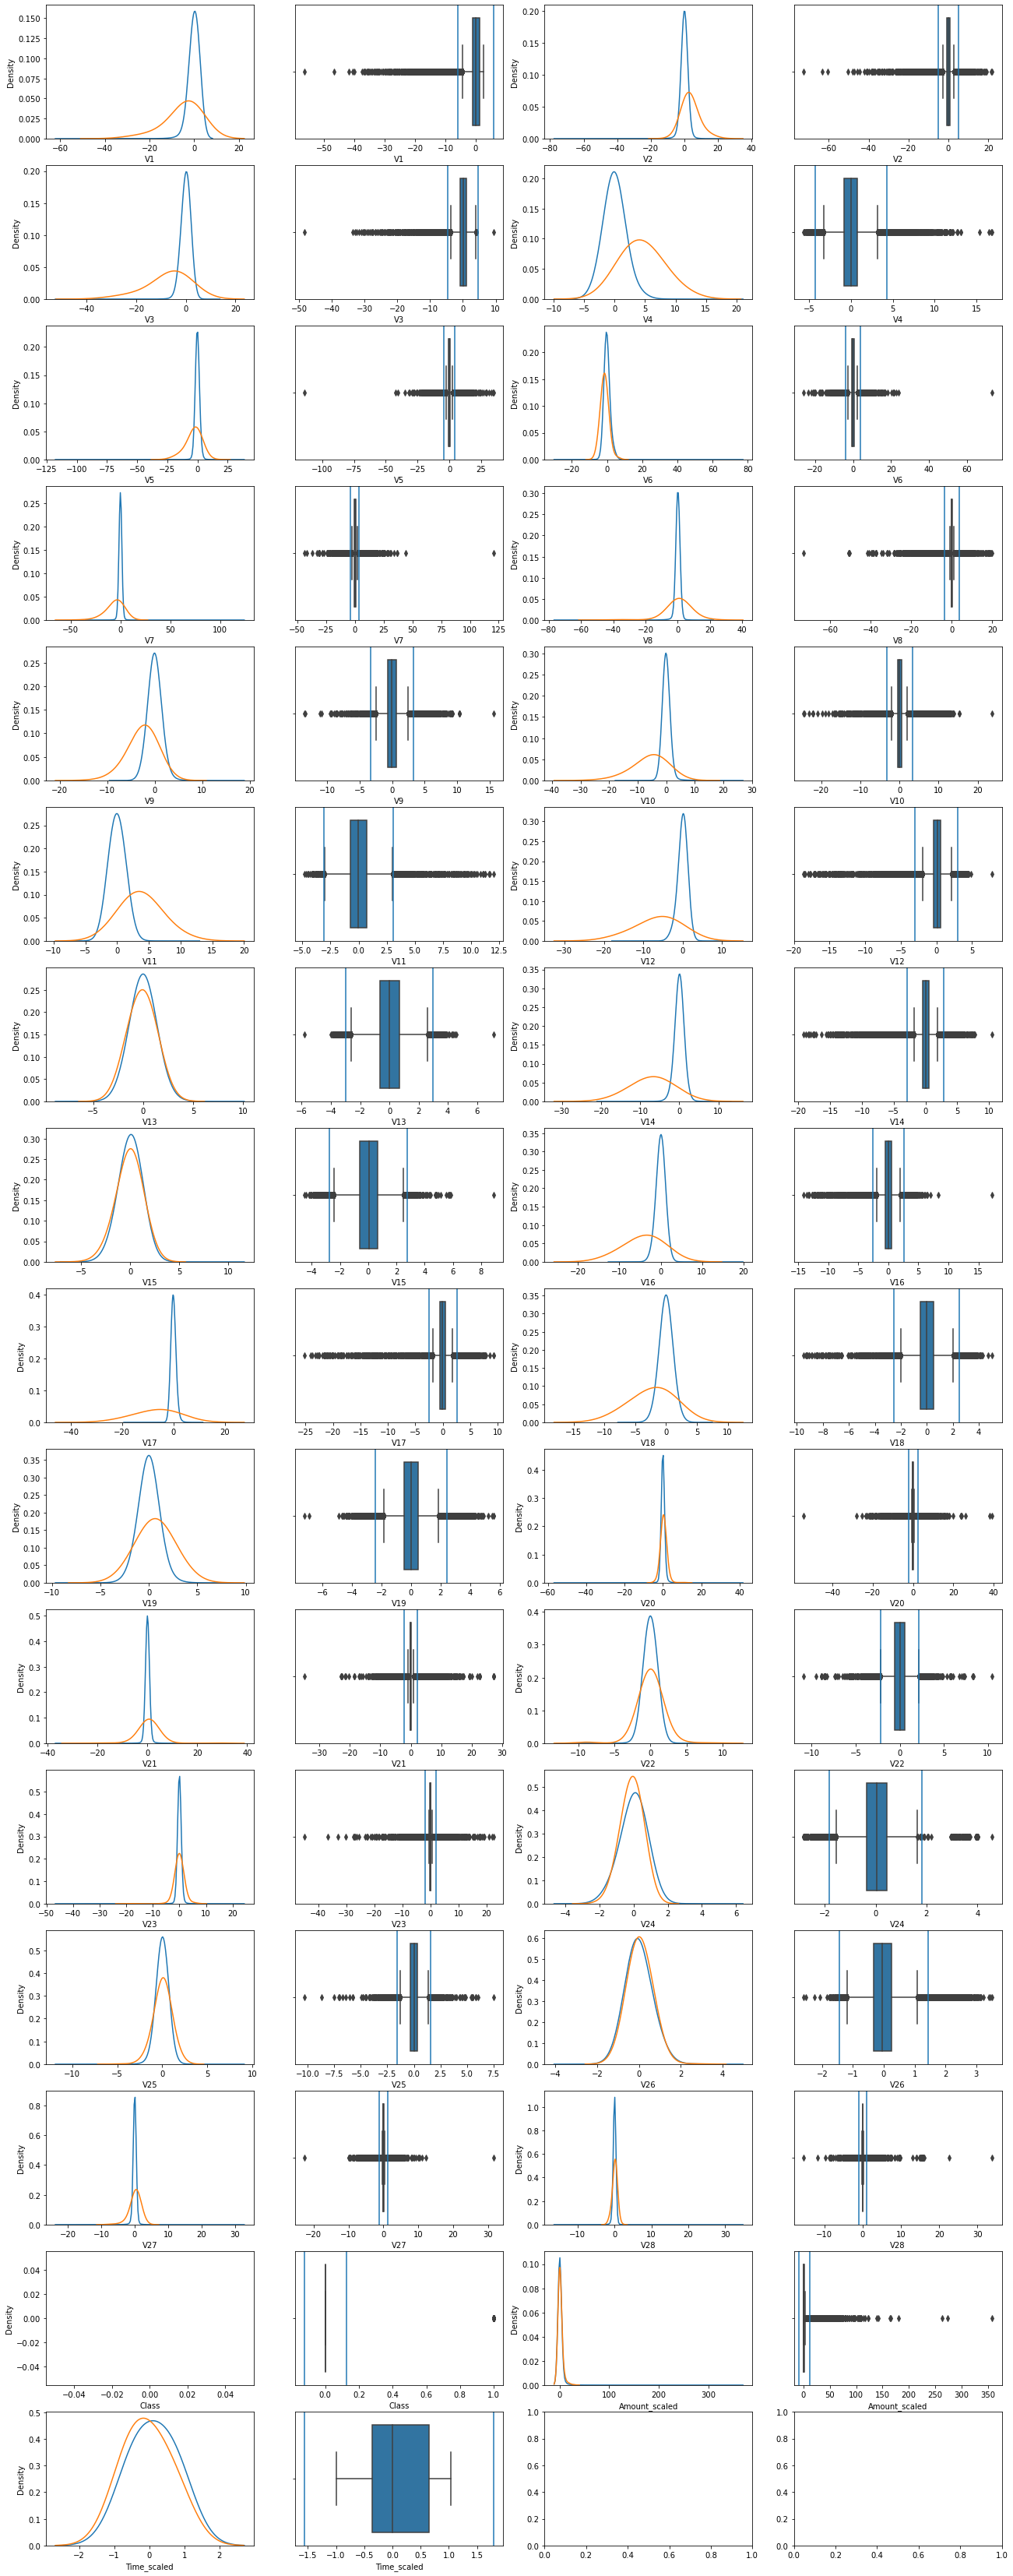

In [18]:
i=0
temp0=df.loc[df.Class==0]
temp1=df.loc[df.Class==1]

plt.figure()
fig, ax =plt.subplots(16,4, figsize=(22,60))

for values in df.columns.values:
    if i==32:
        break
    else:
        plt.subplot(16,4,2*i+1)
        sns.kdeplot(temp0[values], bw=1, label='Class=0')
        sns.kdeplot(temp1[values], bw=1, label='Class=1')
        plt.xlabel(values)
        
        
        plt.subplot(16,4,2*i+2)
        sns.boxplot(df[values], hue=df['Class'])
        mean=df[values].mean()
        std=df[values].std()
        plt.axvline(mean-3*std, 0, 1)
        plt.axvline(mean+3*std, 0, 1)
       
        i+=1

    
plt.show()

<AxesSubplot:>

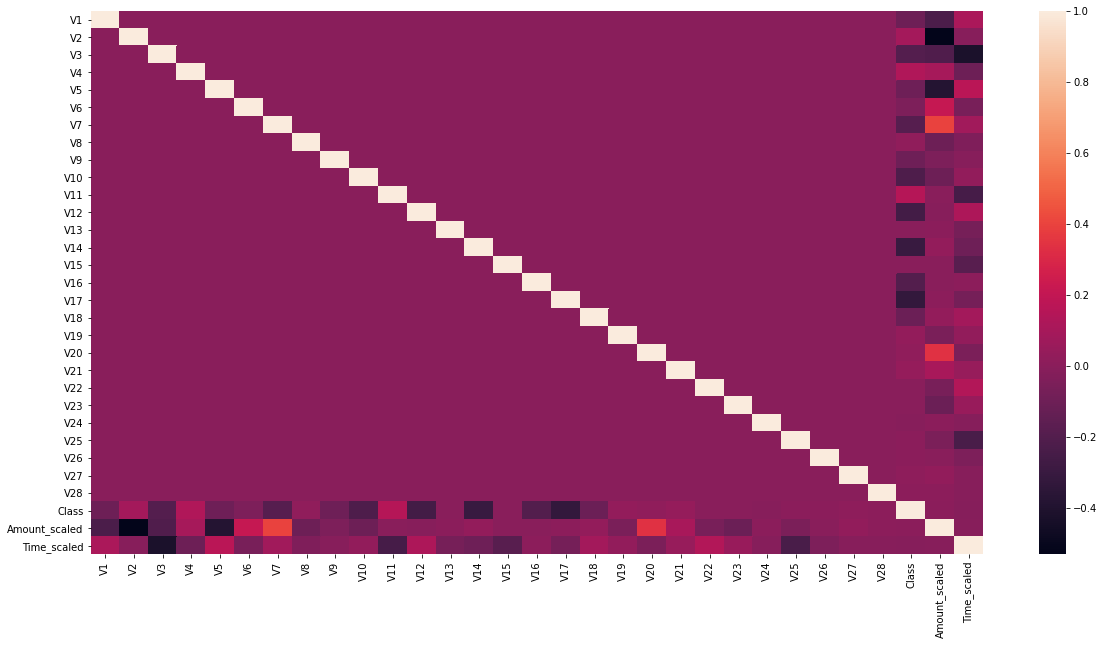

In [19]:
plt.figure(figsize=(20,10))
cm=df.corr()
sns.heatmap(cm)

In [20]:
X=df.drop('Class', axis=1)
y=df['Class']

## Splitting Data

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=4 )

len(X_train), len(X_test)


(199364, 85443)

In [29]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
X_train_sm, y_train_sm=smote.fit_resample(X_train, y_train)
len(X_train_sm), len(y_train_sm)

(398036, 398036)

In [31]:
from sklearn.linear_model import LogisticRegression
lr_sm= LogisticRegression()
lr_sm.fit(X_train_sm, y_train_sm)
y_pred_sm=lr_sm.predict(X_test)

<AxesSubplot:>

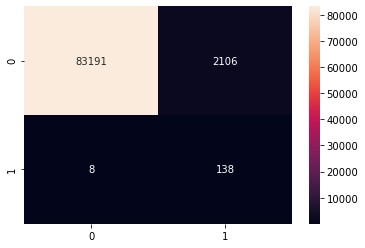

In [42]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred_sm)
sns.heatmap(cm, annot=True, fmt='d',
)


In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_sm))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85297
           1       0.06      0.95      0.12       146

    accuracy                           0.98     85443
   macro avg       0.53      0.96      0.55     85443
weighted avg       1.00      0.98      0.99     85443

